# TensorFlow Logistic Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 해당 매트릭스의 열정보만 뜯어내는 함수
def column(matrix, i):
    return [row[i] for row in matrix]

In [3]:
num_points = 100
vectors_set = []
# 결과가 0인 데이터들
for i in range(num_points):
    x1 = np.random.normal(10.0, 0.55)
    x2 = np.random.normal(15.0, 0.6)
    y = 0.
    vectors_set.append([x1, x2, y])

# 결과가 1 인 데이터들
for i in range(num_points):
    x1 = np.random.normal(13.0, 0.55)
    x2 = np.random.normal(17.0, 0.6)
    y = 1.
    vectors_set.append([x1, x2, y])

x_data = [[v[0], v[1]] for v in vectors_set]
y_data = [v[2] for v in vectors_set]
x_data = np.insert(x_data, 0, 1, axis=1)
# y_data = np.reshape(y_data,[len(x_data), 1])
y_data = np.array(y_data)
x_data = np.transpose(x_data)
print(x_data.shape)
x_data

# plt.plot(column(x_data, 0), column(x_data, 1), 'ro')
# plt.show()




(3, 200)


array([[  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.

In [4]:
print(y_data.shape)
y_data

(200,)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

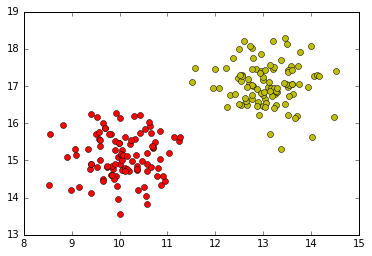

In [5]:
# 결과물을 표로 보고 싶다면
x_data_0 = [[v[0], v[1]] for v in vectors_set if v[2] == 0]
x_data_1 = [[v[0], v[1]] for v in vectors_set if v[2] == 1] 
plt.plot(column(x_data_0, 0), column(x_data_0, 1) , 'ro', label='Group1')
plt.plot(column(x_data_1, 0), column(x_data_1, 1) , 'yo', label='Group2')
plt.show()

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [7]:
print(len(x_data))
print(len(x_data[0]))

3
200


In [8]:
W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

In [9]:
h = tf.matmul(W, X)

In [10]:
hypo = tf.sigmoid(h)

In [11]:
cost = -tf.reduce_mean(Y*tf.log(hypo) + (1-Y)*tf.log(1.-hypo))

In [12]:
alpha = tf.Variable(0.01)

In [13]:
optimizer = tf.train.GradientDescentOptimizer(alpha)

In [14]:
train = optimizer.minimize(cost)

In [15]:
init = tf.initialize_all_variables()

In [16]:
sess = tf.Session()
sess.run(init)

for step in range(1000):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    if step % 200 == 0:
        print("step :", step)
        print("cost :", sess.run(cost, feed_dict={X:x_data, Y:y_data}))
        print("W :", sess.run(W))
        print("="*50)
        # plt.plot(column(x_data_0, 0), column(x_data_0, 1) , 'ro', label='Group1')
        # plt.plot(column(x_data_1, 0), column(x_data_1, 1) , 'yo', label='Group2')
        # plt.plot(x_data, sess.run(hypo, feed_dict={X:x_data}), 'b-', label='hyper function')
        # plt.show()

step : 0
cost : 4.19624
W : [[-0.55167961  0.51008821 -0.85130852]]
step : 200
cost : 0.401976
W : [[-0.58601713  1.00540209 -0.67845219]]
step : 400
cost : 0.372819
W : [[-0.63661689  1.19823277 -0.81411386]]
step : 600
cost : 0.352616
W : [[-0.68381524  1.35803854 -0.92618656]]
step : 800
cost : 0.337848
W : [[-0.72847891  1.49394476 -1.02120054]]


In [17]:
def is_pass(predict_value):
    return predict_value > 0.5

In [18]:
test_x = np.reshape([1, 2, 15], [3,1])
p_value = sess.run(hypo, feed_dict={X:test_x})
print(p_value)
print(is_pass(p_value))

test_x = np.reshape([1, 20, 20], [3,1])
p_value = sess.run(hypo, feed_dict={X:test_x})
print(p_value)
print(is_pass(p_value))

[[  7.58067927e-07]]
[[False]]
[[ 0.99991679]]
[[ True]]
